In [77]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import re
from datetime import datetime
import spacy.cli

__Instrucciones:__ A continuación verá una lista de ejercicios que debe completar para poder entregar el la hoja de trabajo #3. Al finalizar, todos sus archivos deben estar contenidos en un archivo ht3-sucarnet.zip. Este archivo lo debe entregar en el link del GES. Por favor cree una carpeta para cada ejercicio que usted realice.

## Problema 1:
Utilice expresiones regulares para validar las siguintes situaciones:



1. Implemente una regex para validar un correo electrónico en general, a continuación se muestran algunos ejemplos.

    * Guate.360-porelmundo@miguate.com
    * Miercoles3@hotmail.com
    * Progra3.galileo@galileo.edu

In [13]:
def validacionCorreo(correos, x = 0):
    """Validación de correos eléctronicos """
    regex = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    correos_correctos = []
    correos_errores = []
    
    for correo in correos:
        if re.match(regex, correo):
            correos_correctos.append(correo)
        else:
            correos_errores.append(correo)
    
    if x == 0:
        return print("Correos Validos "+ str(correos_correctos)) 
    else:
        return print("Correos No Validos "+ str(correos_errores))
    

In [14]:
lista_correos = [
    "Guate.360-porelmundo@miguate.com",
    "Miercoles3@hotmail.com",
    "Progra3.galileo@galileo.edu",
    "mp3_sdf.com",
    "usuario@dominio.",
    "@dominio.com",
    "apple.com.usa"
]

In [17]:
validacionCorreo(lista_correos, x = 0)

Correos Validos ['Guate.360-porelmundo@miguate.com', 'Miercoles3@hotmail.com', 'Progra3.galileo@galileo.edu']


2. implemente una regex para validar la dirección url de una página web con los tipos de domino (.com, .org, .edu). Note que la url incluye el protocolo (http o https) y los símbolos (//www.), a continuación se muestran algunos ejemplos:

    *  https://www.guate360-porelmundo.com
    *  http://www.a2.net
    *  https://www.galileo.edu
    *  http://www.8.org (no valida)
    

In [132]:
def validarUrl(link, x = 0):
    """Validar enlaces correctas"""
    
    regex = r'^https?://www\.(?![0-9]$)(?![a-zA-Z]$)(?![-.]$)([a-zA-Z0-9-]+)\.(com|org|edu)$'
    url_correctos = []
    url_errores = []
    
    for enlaces in link:
        if re.match(regex, enlaces) and len(re.match(regex, enlaces).group(1)) > 4 :
            url_correctos.append(enlaces)
        else:
            url_errores.append(enlaces)
    
    if x == 0:
        return print("URL Validos "+ str(url_correctos)) 
    else:
        return print("URL No Validos "+ str(url_errores))
    
urls = [
    "https://www.guate360-porelmundo.com",
    "http://www.a2.net",
    "https://www.galileo.edu",
    "http://www.8.org",
    "https://guatemala.gt",
    "ftp://www.Apple.com",
    "Hyttps://www.Siman.com"
]

In [133]:
validarUrl(urls, x = 0)

URL Validos ['https://www.guate360-porelmundo.com', 'https://www.galileo.edu']


3. Implemente una regex para validar una MAC Address, notar que las mac addres están divididas en 6 bloques de caracteres hexadecimales, es decir que los símbolos solo pueden variar del 0 al 9 y las letras de la A a la F. a continuación se muestran algunos ejemplos:
    * 5A 6F AF 8C 9B 1D
    * 6D 6C 4D 3A EB 3F
    * 3A 7C FA C8 6D 4J

In [131]:
def validar_mac_addresses(mac_addresses):
    patron_mac = r'^([0-9A-Fa-f]{2}\s){5}[0-9A-Fa-f]{2}$'
    mac_validas = []
    mac_no_validas = []

    for mac in mac_addresses:
        if re.match(patron_mac, mac):
            mac_validas.append(mac)
        else:
            mac_no_validas.append(mac)
    
    return mac_validas, mac_no_validas

macs = [
    "5A 6F AF 8C 9B 1D",
    "6D 6C 4D 3A EB 3F",
    "3A 7C FA C8 6D 4J"
]

mac_validas, mac_no_validas = validar_mac_addresses(macs)

print("MACs válidas:")
for mac in mac_validas:
    print(mac)

print("\nMACs no válidas:")
for mac in mac_no_validas:
    print(mac)

MACs válidas:
5A 6F AF 8C 9B 1D
6D 6C 4D 3A EB 3F

MACs no válidas:
3A 7C FA C8 6D 4J


4. Implemente una regex para validar una dirección IPv4, notar que las direcciones IPv4 estan divididas en 4 bloques de valores los cuales solo pueden ir desde 0 hasta 255, una ip donde algunos de sus bloques sea mayor a 255 no es valida, además tome en cuenta que cada bloque está separada por un punto. A continuación se muestran algunos ejemplos:


  * 192.16.8.1
  * 234.56.78.90
  * 1.2.3.4
  * 192.168.45.345 (no valida por que el ultimo bloque es mayor a 255)

In [ ]:
def validar_ipv4(direcciones_ipv4):
    regex = r"^(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$"

    correctos = []
    incorrectos = []

    for ipv4 in direcciones_ipv4:
        if re.match(regex, ipv4):
            correctos.append(ipv4)
        else:
            incorrectos.append(ipv4)

    return correctos, incorrectos

# Ejemplo de uso
direcciones = ["192.168.1.1", "256.0.0.1", "1.2.3.4", "192.168.45.345"]
correctos, incorrectos = validar_ipv4(direcciones)
print("Direcciones IPv4 correctas:", correctos)
print("Direcciones IPv4 incorrectas:", incorrectos)

5. Implemente una regex para validar una fecha con la secuencia día-mes-año donde el día, mes y añoo puedan estar separados ya sea por el caracter / o el caracter - o el caracter ., notar que las fechas son validas si los si los días están definidos desde el 1 al 31, el mes del 1 al 12 y el año de 2000 al 2019. También debe tomar en cuenta que los días y meses pueden estar escritos ya sea con uno o dos caracteres por ejemplo: Enero puede escribirse como 1 o como 01. Los años también pueden expresarse ya sea con dos o con cuatro caracteres por ejemplo:


    19 o 2019 son validos. A continuación se muestran algunos ejemplos:

  * 20/1/2019
  * 12.03.2005
  * 31-11-08
  * 1-1-2012
  * 12-12-22 (no valida, por que el año supera al 2019).

In [3]:
regex = r"^(0?[1-9]|[12][0-9]|3[01])[-./](0?[1-9]|1[0-2])[-./](20(0[0-9]|1[0-9])|2019)$"

fechas = ["20/1/2019", "12.03.2005", "31-11-2015", "1-1-2012", "12-12-22"]

for fecha in fechas:
    if re.match(regex, fecha):
        print(f"{fecha} es una fecha válida.")
    else:
        print(f"{fecha} no es una fecha válida.")

20/1/2019 es una fecha válida.
12.03.2005 es una fecha válida.
31-11-2015 es una fecha válida.
1-1-2012 es una fecha válida.
12-12-22 no es una fecha válida.


## Problema 2:

En la carpeta encontrará adjuntos 21 documentos que tiene 100 fechas en la secuencia días-mes-año pero con distinto separador y distinto formato de mes, en algunos casos aparece un numero y en otros el nombre del mes en ingles, por ejemplo: Enero pueder aparecer como 1 o como Jan.

Utilice Python y expresiones regulares para encontrar el día, mes y año promedio total del los 21 archivos, los resultados deben ser un double.

In [4]:
Fechas = []

for i in range(1,22):
    data = pd.read_csv("D{i}.txt".format(i=i), header=None).rename(columns = {0: "Fecha"})
    Fechas.append(data)

df = pd.concat(Fechas)


In [6]:
def replace_month(match):
    month_mapping = {
        "jan": "01",
        "feb": "02",
        "mar": "03",
        "apr": "04",
        "may": "05",
        "jun": "06",
        "jul": "07",
        "aug": "08",
        "sep": "09",
        "oct": "10",
        "nov": "11",
        "dec": "12"
    }

    return month_mapping.get(match.group().lower(), match.group())

dates = list(df["Fecha"])

clean_dates = []

for date in dates:
    # Reemplazar los nombres de meses por sus equivalentes numéricos
    normalized_date = re.sub(r"\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\b", replace_month, date, flags=re.IGNORECASE)
    clean_dates.append(normalized_date)

In [20]:

def normalize_dates(date):
    formats = [
        r"(\d{2})[-./](\d{2})[-./](\d{4})",  # Formato: dd/mm/yyyy
        r"(\d{2})[-./](\d{2})[-./](\d{2})"   # Formato: dd/mm/yy
    ]

    for format_regex in formats:
        match = re.match(format_regex, date)
        if match:
            day, month, year = match.groups()
            return f"{day.zfill(2)}/{month.zfill(2)}/{year.zfill(4)}"

    return None  

# Datos para limpiar
dates1 = clean_dates

normalized_dates = []

for date in dates1:
    normalized_date = normalize_dates(date)
    if normalized_date:
        normalized_dates.append(normalized_date)

# Calcular el promedio de las fechas
total_dates = len(normalized_dates)
total_days = sum(int(date.split('/')[0]) for date in normalized_dates)
total_months = sum(int(date.split('/')[1]) for date in normalized_dates)
total_years = sum(int(date.split('/')[2]) for date in normalized_dates)

average_day = total_days / total_dates
average_month = total_months / total_dates
average_year = total_years / total_dates

print("Promedio de día:", average_day)
print("Promedio de mes:", average_month)
print("Promedio de año:", average_year)

Promedio de día: 15.624761904761904
Promedio de mes: 6.4664761904761905
Promedio de año: 2016.6869047619048


## Problema 3:
Descargue el Dataset (de click aquí para descargar) el cual contiene aproximadamente 800,000
tweets de diversos temas.

Usando CoLab y expresiones regulares. Determine los 3 usuarios más populares dentro del
dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:

 * Content: Tweet.
 * Metadata: ID, Timestamp, Length (este valor hay que calcularlo).

Posterior a tener sus 3 corpus creados, responda: ¿Razón por la que citan a ese usuario? para
esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que más rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo
de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:

1. Remover stopwords.
2. Realizar stemming y lemmatización.
3. Mostrar un Wordcloud con el top 10 para cada usuario.


In [2]:
df_tweet = pd.read_csv("tw_source.csv", sep = ",", encoding = "ISO-8859-1", header = None )\
            .rename(columns={0: "no.",1:"id",2:"fecha",3:"query",4:"user", 5:"content"} )

#### Obteniendo los usuarios con más tweets

Como se puede observar, lo primero tres usuarios __(lost_dog, webwoke, tweetpet)__ serán parte del análisis debido a que son los que tienen más tweets.

In [66]:
top_users = df_tweet['user'].value_counts().sort_values(ascending = False).head(10)
top_users

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: user, dtype: int64

#### Filtrando los 3 usuarios con más tweets

In [67]:
users = ["lost_dog", "webwoke", "tweetpet"]
df_tweetUser = df_tweet[df_tweet['user'].isin(users)].rename(columns = {"fecha" : "timestamp"} )


In [68]:
df_tweetUsers = df_tweetUser[["id","timestamp","user","content"]].reset_index(drop = True)

#### Corpus

In [71]:
def remove_repeated_chars(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

def Normalizacion(text):
    cleaned_doc = re.sub(r'@[^\s]+|https?://[^\s]+', '', text)
    cleaned_doc = remove_repeated_chars(cleaned_doc)
    cleaned_doc = re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', cleaned_doc).lower().strip().rstrip('\n').rstrip('\r\n')
    return cleaned_doc

In [72]:
df_tweetUsers["contents"] = df_tweetUsers["content"].apply(Normalizacion)

#### Tokenización

In [78]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [80]:
def Tokenizacion(corpus):
    """
    Esta función aplica la tokenización de elementos para cada correo usando el modelo
    de lenguaje en_core_web_sm
    """
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(doc))
    return newCorpus   

In [82]:
tokenizacion_contents = Tokenizacion(df_tweetUsers["contents"])

#### stopwords

In [83]:
def RemoveStops(corpus):
    newCorpus = []

    for doc in corpus:
        s = ''
        for token in doc:
            if(token.is_stop == False):
                s= s+token.text + ' '
        newCorpus.append(s.strip())
    return newCorpus

In [85]:
stopwords_contents = RemoveStops(tokenizacion_contents)

#### steaming y lematizatin

In [86]:
def stemmingLemmating(corpus):
    documentos = Tokenizacion(corpus)
    newCorpus = []
    for doc in documentos:
        s = ''
        for token in doc:
            s = s+token.lemma_ + ' '
        newCorpus.append(s.strip())
    return newCorpus

#### Función completa 

In [91]:

#spacy.cli.download("en_core_web_sm")

# Definir las funciones de limpieza y procesamiento de texto
def remove_repeated_chars(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

def Normalizacion(text):
    cleaned_doc = re.sub(r'@[^\s]+|https?://[^\s]+', '', text)
    cleaned_doc = remove_repeated_chars(cleaned_doc)
    cleaned_doc = re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', cleaned_doc).lower().strip().rstrip('\n').rstrip('\r\n')
    return cleaned_doc

def RemoveStops(corpus):
    newCorpus = []
    for doc in corpus:
        s = ''
        for token in doc:
            if(token.is_stop == False):
                s= s+token.text + ' '
        newCorpus.append(s.strip())
    return newCorpus

def Tokenizacion(corpus):
    nlp = spacy.load("en_core_web_sm")
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(doc))
    return newCorpus   

# Obtener una columna 'contents' con texto normalizado
df_tweetUsers["contents"] = df_tweetUsers["content"].apply(Normalizacion)

# Aplicar tokenización y eliminación de stopwords
tokenizacion_contents = df_tweetUsers["contents"]
documentos_tokenizados = Tokenizacion(tokenizacion_contents)  # Obtener los documentos tokenizados

stopwords_contents = RemoveStops(documentos_tokenizados)  # Aplicar RemoveStops a los documentos tokenizados

# Aplicar lematización y stemming
stemmingLemmating_content = stemmingLemmating(stopwords_contents)

#### Wordcloud

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [94]:
user_words = {}  # Diccionario para almacenar las palabras por usuario

for i, user in enumerate(df_tweetUsers["user"]):
    if user not in user_words:
        user_words[user] = []
    user_words[user].extend(stemmingLemmating_content[i].split())

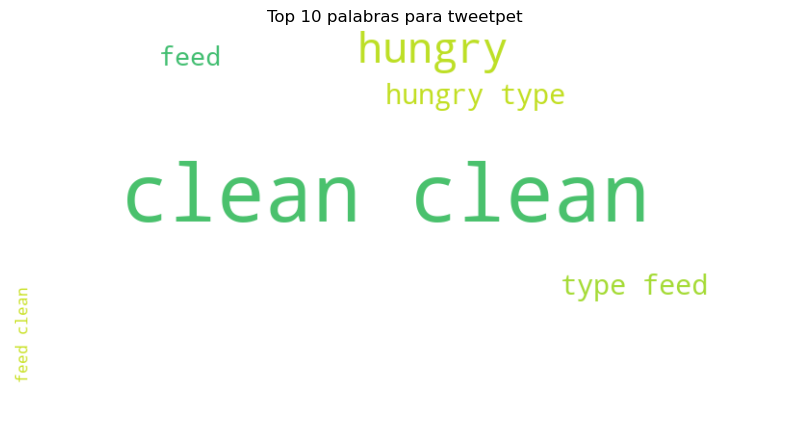

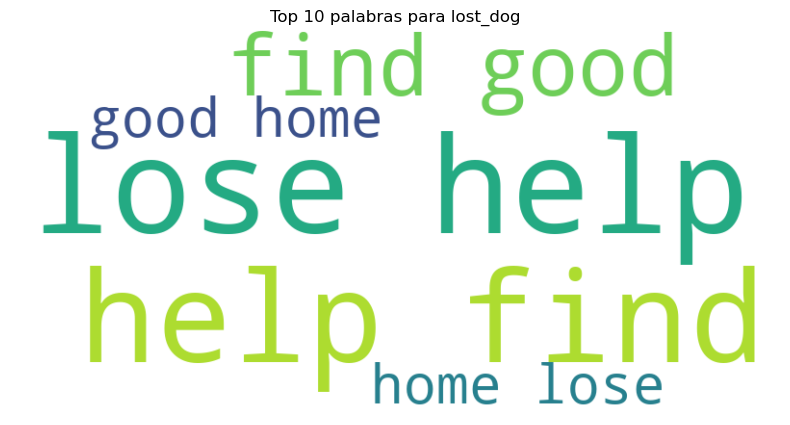

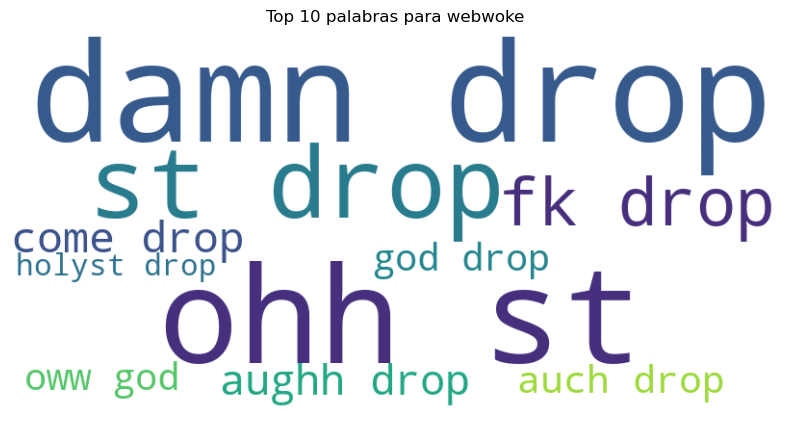

In [95]:
for user, words in user_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=10).generate(' '.join(words))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top 10 palabras para {user}")
    plt.axis('off')
    plt.show()